In [1]:
from  Controller import TrainingController_V2
from Utils.parameters import load_parameters

In [2]:
training_parameters = load_parameters("./SavedModels/0.9821_BreastCancer_BaseNNModel_2021-05-13 04:41:16.872169")

In [3]:
trainer = TrainingController_V2(parameters=training_parameters)


| Running on cuda:0  

| Model initialised 


<Figure size 1600x800 with 0 Axes>

In [4]:
trainer.show_model_info()


| Model Structure 
BaseNNModel(
  (model): Sequential(
    (0): Linear(in_features=30, out_features=8, bias=True)
    (1): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01, inplace=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=8, out_features=8, bias=True)
    (5): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.01, inplace=True)
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=8, out_features=8, bias=True)
    (9): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.01, inplace=True)
    (11): Dropout(p=0.2, inplace=False)
    (12): Linear(in_features=8, out_features=8, bias=True)
    (13): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): LeakyReLU(negative_slope=0.01, inplace=True)
    (15): Dropout(p=0

| Epoch [124] | Step [500] | lr [0.005000] | Loss: [0.1305] | Acc: [0.9718]|
| Performing Validation ... 

| Evaluation result | Loss [0.1172] | Accuracy [0.9483]  


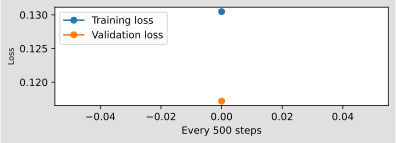

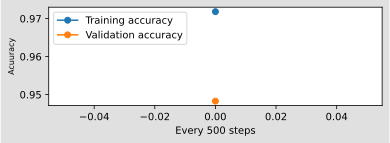

| Epoch [249] | Step [1000] | lr [0.004000] | Loss: [0.1339] | Acc: [0.9577]|
| Performing Validation ... 

| Evaluation result | Loss [0.1878] | Accuracy [0.9310]  


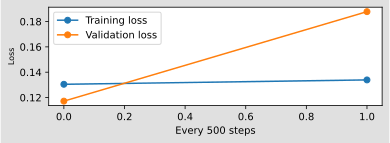

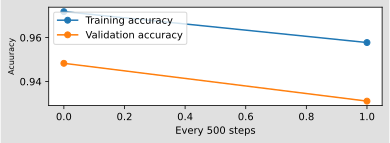

| Epoch [374] | Step [1500] | lr [0.004000] | Loss: [0.1030] | Acc: [0.9718]|
| Performing Validation ... 

| Evaluation result | Loss [0.1716] | Accuracy [0.9483]  


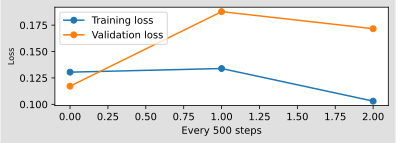

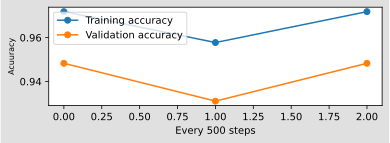

| Epoch [499] | Step [2000] | lr [0.003200] | Loss: [0.0855] | Acc: [0.9577]|
| Performing Validation ... 

| Evaluation result | Loss [0.2390] | Accuracy [0.9483]  


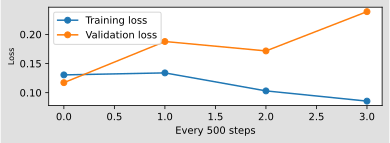

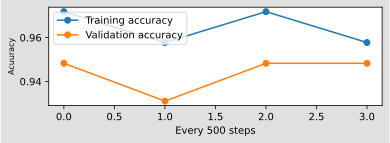

| Epoch [624] | Step [2500] | lr [0.002560] | Loss: [0.0881] | Acc: [0.9718]|
| Performing Validation ... 

| Evaluation result | Loss [0.2336] | Accuracy [0.9310]  


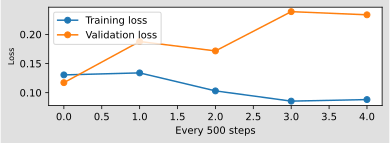

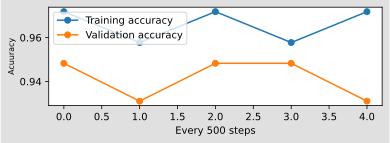

| Epoch [749] | Step [3000] | lr [0.002560] | Loss: [0.0460] | Acc: [1.0000]|
| Performing Validation ... 

| Evaluation result | Loss [0.2357] | Accuracy [0.9483]  


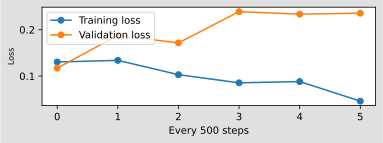

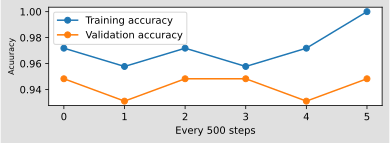

| Epoch [874] | Step [3500] | lr [0.002048] | Loss: [0.0373] | Acc: [1.0000]|
| Performing Validation ... 

| Evaluation result | Loss [0.2441] | Accuracy [0.9483]  


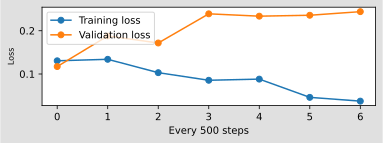

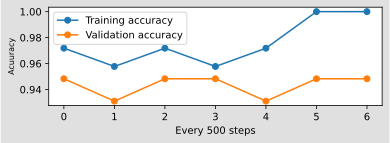

| Epoch [999] | Step [4000] | lr [0.001638] | Loss: [0.1488] | Acc: [0.9577]|
| Performing Validation ... 

| Evaluation result | Loss [0.2572] | Accuracy [0.9483]  


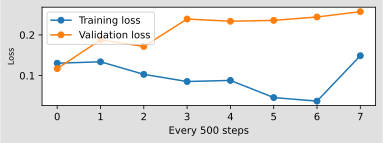

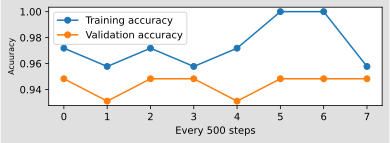


| Training Done! 

| Performing Testing ... 

| Performing Testing ... 

| Evaluation result | Loss [0.0159] | Accuracy [1.0000]  

| Classification Report 
           True  False  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    43.0   13.0       1.0       56.0          56.0

| Confusion Matrix 
       True  False
True     43      0
False     0     13


In [5]:
trainer.train()

In [6]:
trainer.save_training_result("training_v2.ipynb")

TypeError: vars() argument must have __dict__ attribute

In [6]:
######## Create a little model to see if it's trainable.

In [7]:
# Check for the accuracy calculation

In [8]:
###### Parameters Count ######
# LSTM: 

In [9]:
# 0.8591_BPI2012_BaseLineLSTMModel_2021-05-13 04:01:28.647044
# 0.7632_Diabetes_BaseNNModel_2021-05-13 04:25:57.514112